In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import os
from tqdm import tqdm
from sklearn.model_selection import train_test_split


In [2]:
def read_all_csv_files(directory_path, features, limit=1000000):
    # Initialize an empty list to store dataframes from CSV files
    dataframes = []

    # Get a list of all files in the directory
    file_list = os.listdir(directory_path)

    # Loop through each file and check if it's a CSV file
    for file_name in file_list:
        if file_name.endswith('.csv'):
            # Get the full file path
            file_path = os.path.join(directory_path, file_name)
            # Read the CSV file into a pandas DataFrame
            df = pd.read_csv(file_path)
            # Remove leading and trailing spaces from column names
            df.columns = df.columns.str.strip()
            df['Stratify'] = file_name
            # Append the DataFrame to the list
            dataframes.append(df[features])

    # Merge all DataFrames into a single DataFrame
    merged_df = pd.concat(dataframes, ignore_index=True)
    print("Initial Row: {}".format(merged_df.shape[0]))
    
    #applying limit if row_count > limit
    if len(merged_df) > limit:
        print("As Row Exceeds {0}, we are taking upto {1} rows".format(limit, limit))
        #merged_df = merged_df.sample(limit, random_state=42)
        sampled_df, _ = train_test_split(
            merged_df, 
            train_size=limit,  # Select 'limit' rows
            stratify=merged_df['Stratify'], 
            random_state=42
        )

        return sampled_df
    
    return merged_df


In [3]:
def sanitize_data_frames_updated(dataframe, limit=1000000, remove_infinity=True, remove_null=True):
    print("Before Santization Row Count:", dataframe.shape[0])

    if remove_infinity:
        numeric_cols = dataframe.select_dtypes(include=[np.number]).columns
        infinite_counts = dataframe[numeric_cols].applymap(np.isinf).sum()
        for col, count in infinite_counts.items():
            if count != 0:
                print(f"Column '{col}' contains {count} infinite values.")
                if limit is not None:
                    dataframe = dataframe[~np.isinf(dataframe[col])]

    if remove_null:
        null_counts = dataframe.isnull().sum()
        for col, count in null_counts.items():
            if count != 0:
                print(f"Column '{col}' contains {count} null values.")
                if limit is not None:
                    dataframe = dataframe.dropna(subset=[col])
    
    print("Sanitized Row Count:", dataframe.shape[0])    
    return dataframe

In [4]:
#all dataset sources to make iterate to read csv files
dataset_sources = {

    'client_1': {
        'benign': '../row_data_nonIID/{}/benign',
        'attack': '../row_data_nonIID/{}/attack',
    },
    'client_2': {
        'benign': '../row_data_nonIID/{}/benign',
        'attack': '../row_data_nonIID/{}/attack',
    },
    'client_3': {
        'benign': '../row_data_nonIID/{}/benign',
        'attack': '../row_data_nonIID/{}/attack',
    },
    'client_4': {
        'benign': '../row_data_nonIID/{}/benign',
        'attack': '../row_data_nonIID/{}/attack',
    },

}

In [6]:
# @features is the features are from Old CIC
# @Features_v2 are from new CIC
features=[ 'Total Length of Bwd Packet', 'Fwd Pkt Len Std','ACK Flag Cnt', 'Tot Fwd Pkts','Tot Bwd Pkts','TotLen Fwd Pkts','TotLen Bwd Pkts','Fwd Seg Size Min', 
          'Pkt Size Avg','Pkt Len Mean', 'Fwd Pkt Len Mean', 'Bwd Pkt Len Mean', 'Flow IAT Mean' 'Stratify']
features_v2=[ 
   'Total Length of Bwd Packet',
    'Flow IAT Mean',
    'Packet Length Variance',
    'Stratify'
]

In [ ]:
# web_service_counts = get_flow_stats_by_category(unicauca_df, list(unicauca_traffic.keys()))
# web_service_counts

In [ ]:
##Reading all the data
## type =client
## app = bening or attack
for type, type_group in tqdm(dataset_sources.items(), total=len(dataset_sources)):
    locals()[type] = {}

for type, type_group in tqdm(dataset_sources.items(), total=len(dataset_sources)):
    for app, path in type_group.items():
        print(f' Loading....Type = {type}, application = {app}', type, app)
        dataframe = read_all_csv_files(path.format(type), features_v2)
        dataframe = sanitize_data_frames_updated(dataframe)
        locals()[type][app] = dataframe
        print(f' Loading....Type = {type}, application = {app}', type, app)
        print("\n\n")
    


In [48]:
# ##Function to draw the box plot
# def draw_box_plot(data, tick_list, title, x_label="", y_label="", show_outliers=False, vertical=True, size=(6,3), tick_color=[], save_path=None):
#     #Finding the Tick Numbers

#      # Make sure the length of tick_color list matches the length of tick_list
#     if tick_color and len(tick_color) != len(tick_list):
#         raise ValueError("tick_color list must match the length of tick_list")
    
#     tick_numbers = [index+1 for index, value in enumerate(tick_list)]
#     fig, ax = plt.subplots(figsize=size)
#     plt.suptitle(title)
#     ax = fig.add_axes([0, 0, 1, 1])
#     bp = ax.boxplot(data, showfliers=show_outliers, vert=vertical, patch_artist=True)
#     #bp = ax.boxplot(data, showfliers=show_outliers, vert=vertical)
#     plt.xticks(tick_numbers, tick_list, rotation=90)    
#     #plt.xticks(rotation=90)

#     # Set the color of the tick labels if tick_color list is provided
#     if len(tick_color) > 0:
#         for tick_label, color in zip(ax.get_xticklabels(), tick_color):
#             tick_label.set_color(color)
    
#     ax.set_ylabel(y_label)
#     # plt.yscale('log')

#     if save_path:
#         plt.savefig(save_path, dpi=300, bbox_inches="tight")
#         print(f"Plot saved to: {save_path}")

    
#     plt.show()

## Function to draw and save the box plot
def draw_box_plot(data, tick_list, title, x_label="", y_label="", 
                  show_outliers=False, vertical=True, size=(6,3), 
                  tick_color=[], save_path=None):
    """
    Draws a box plot and saves it as an image file.

    Parameters:
    - data: List or array-like, dataset for box plot.
    - tick_list: List of labels for x-axis categories.
    - title: Title of the box plot.
    - x_label, y_label: Labels for the axes.
    - show_outliers: Whether to show outliers (default False).
    - vertical: If True, vertical box plot; if False, horizontal.
    - size: Tuple (width, height) for figure size.
    - tick_color: List of colors for x-axis ticks.
    - save_path: File path to save the plot (default None, meaning no saving).
    
    Returns:
    - None (displays and optionally saves the plot)
    """
    
    # Ensure tick_color matches tick_list length
    if tick_color and len(tick_color) != len(tick_list):
        raise ValueError("tick_color list must match the length of tick_list")
    
    tick_numbers = [index+1 for index, _ in enumerate(tick_list)]
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=size)
    
    # Set the title above the plot with padding
    ax.set_title(title, pad=10, fontsize=14)  # Adjust padding if needed
    
    # Create box plot
    bp = ax.boxplot(data, showfliers=show_outliers, vert=vertical, patch_artist=True)
    
    # Set x-axis labels
    plt.xticks(tick_numbers, tick_list, rotation=90)

    # Apply custom tick colors if provided
    if tick_color:
        for tick_label, color in zip(ax.get_xticklabels(), tick_color):
            tick_label.set_color(color)
    
    ax.set_ylabel(y_label)
    plt.xlabel(x_label)

    # Save the plot if a save path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches="tight")
        print(f"Plot saved to: {save_path}")
    
    # Show the plot
    plt.show()

## Feature Analsyis

Plot saved to: /home/sharedrive/PythonCodes/FL_IDS/plots/packet_length_variance_nonIID_benign.png


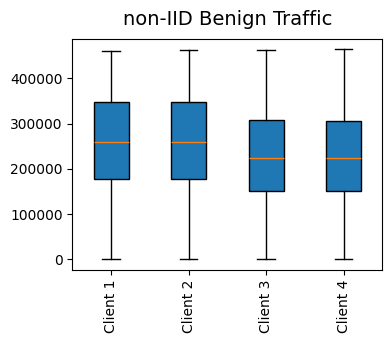

In [53]:
plot_types = {
    'client_1': ['benign'],
    'client_2': ['benign'], 
    'client_3': ['benign'], 
    'client_4': ['benign'], 

}

# plot_types = {
#     'client_1': ['benign', 'attack'],
#     'client_2': ['benign', 'attack'], 
#     'client_3': ['benign', 'attack'], 
#     'client_4': ['benign', 'attack'], 

# }

feature_to_plot = "Packet Length Variance"

#setup tick color
tick_color = {'benign': 'black', 'attack': 'black'}
tcp_apps = ['benign']

data = []
tick_list = []
tick_color_list = []

#UDP Data
for type, type_group in dataset_sources.items():
    if type in list(plot_types.keys()):
        for app, path in type_group.items():
            if app in plot_types.get(type):
                dataset = locals()[type][app]                  
                data.append(dataset[feature_to_plot])
                tick_list.append(format_client_name(type)) 
                
                if app in tcp_apps:
                    tick_color_list.append(tick_color.get('benign'))
                else:
                    tick_color_list.append(tick_color.get('attack'))

#draw_box_plot(data, tick_list, feature_to_plot , '', 'Bytes', True, size=(4,3), tick_color=tick_color_list)
#draw_box_plot_with_outliersssss(data, tick_list, feature_to_plot , '', 'Bytes', False, size=(7,3), tick_color=tick_color_list)
save_path = "/home/sharedrive/PythonCodes/FL_IDS/plots/packet_length_variance_nonIID_benign.png"
draw_box_plot(data, tick_list, "non-IID Benign Traffic" , '', '', True, size=(4,3), tick_color=tick_color_list, save_path=save_path)

In [29]:
def format_client_name(name):
    """
    Corrects 'clinet' to 'Client' and replaces '_' with ' ' in a dynamic variable.
    
    Parameters:
    - name (str): The input string (e.g., 'clinet_1')

    Returns:
    - str: Properly formatted name (e.g., 'Client 1')
    """
    return name.replace("client", "Client").replace("_", " ")

Plot saved to: /home/sharedrive/PythonCodes/FL_IDS/plots/packet_length_variance_nonIID_attack.png


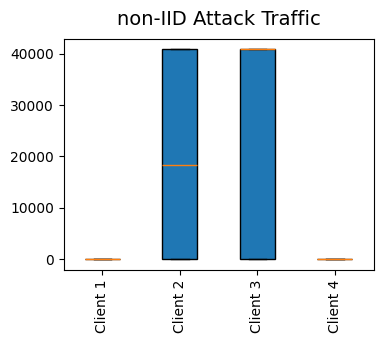

In [54]:
plot_types = {
    'client_1': ['attack'],
    'client_2': ['attack'], 
    'client_3': ['attack'], 
    'client_4': ['attack'], 

}

feature_to_plot = "Packet Length Variance"

#setup tick color
tick_color = {'benign': 'black', 'attack': 'black'}
tcp_apps = ['benign']

data = []
tick_list = []
tick_color_list = []

#UDP Data
for type, type_group in dataset_sources.items():
    if type in list(plot_types.keys()):
        for app, path in type_group.items():
            if app in plot_types.get(type):
                dataset = locals()[type][app]                  
                data.append(dataset[feature_to_plot])
                tick_list.append(format_client_name(type)) 
                
                if app in tcp_apps:
                    tick_color_list.append(tick_color.get('benign'))
                else:
                    tick_color_list.append(tick_color.get('attack'))

save_path = "/home/sharedrive/PythonCodes/FL_IDS/plots/packet_length_variance_nonIID_attack.png"
#save_path = None
draw_box_plot(data, tick_list, "non-IID Attack Traffic" , '', '', True, size=(4,3), tick_color=tick_color_list, save_path=save_path)

Plot saved to: /home/sharedrive/PythonCodes/FL_IDS/plots/flow_iat_mean_nonIID_attack.png


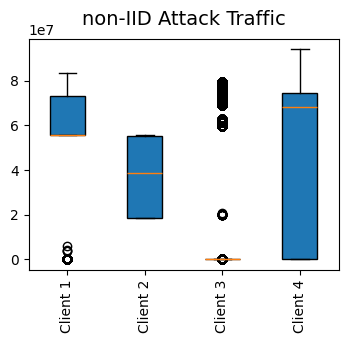

In [55]:
plot_types = {
    'client_1': ['attack'],
    'client_2': ['attack'], 
    'client_3': ['attack'], 
    'client_4': ['attack'], 

}

feature_to_plot = "Flow IAT Mean"

#setup tick color
tick_color = {'benign': 'black', 'attack': 'black'}
tcp_apps = ['benign']

data = []
tick_list = []
tick_color_list = []

#UDP Data
for type, type_group in dataset_sources.items():
    if type in list(plot_types.keys()):
        for app, path in type_group.items():
            if app in plot_types.get(type):
                dataset = locals()[type][app]                  
                data.append(dataset[feature_to_plot])
                tick_list.append(format_client_name(type)) 
                
                if app in tcp_apps:
                    tick_color_list.append(tick_color.get('benign'))
                else:
                    tick_color_list.append(tick_color.get('attack'))

save_path = "/home/sharedrive/PythonCodes/FL_IDS/plots/flow_iat_mean_nonIID_attack.png"
#save_path = None
draw_box_plot(data, tick_list, "non-IID Attack Traffic" , '', '', True, size=(4,3), tick_color=tick_color_list, save_path=save_path)